
<h1>Linear regession </h1>




After completing session  you will be able to:

*   Use scikit-learn to implement simple Linear Regression
*   Create a model, train it, test it and use the model

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline 
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")

## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [68]:
display(df)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [69]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Now, let's plot each of these features against the Emission, to see how linear their relationship is:

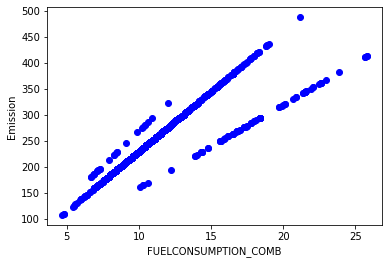

In [70]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

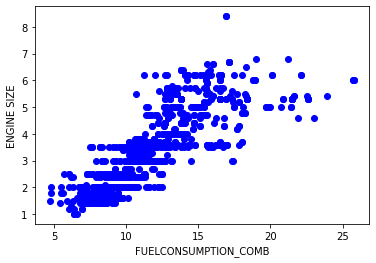

In [71]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.ENGINESIZE, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("ENGINE SIZE")
plt.show()


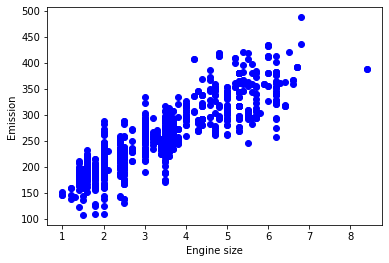

In [72]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h1>Splittting the given data set</h1>


Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.


In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cdf,cdf,test_size=.2,random_state=4);


80% training set and 20% testing set to get a overfitted curve of data
if random_state is not equal to 4, so that it equally distributes the train and the test set

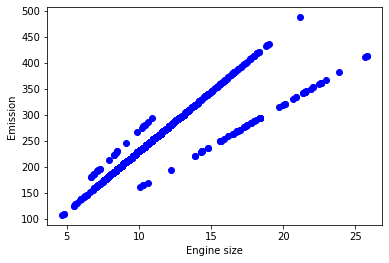

In [74]:
plt.scatter(X_train.FUELCONSUMPTION_COMB,X_train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [75]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(X_train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[15.98088973]]
Intercept:  [70.65002865]


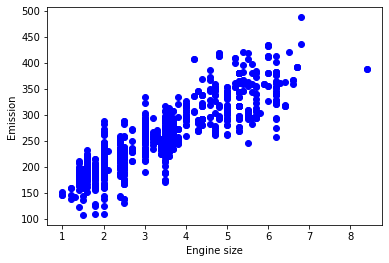

In [76]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [77]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train[['ENGINESIZE']])
train_y = np.asanyarray(X_train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.116937]]
Intercept:  [125.14677576]


Text(0, 0.5, 'Emission')

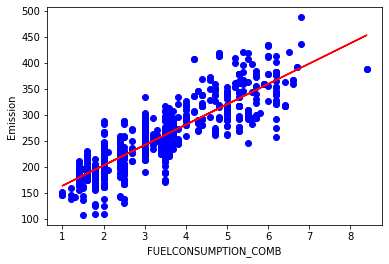

In [78]:
plt.scatter(X_train.ENGINESIZE, X_train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

In [79]:
test_x = np.asanyarray(X_test[['ENGINESIZE']])
test_y = np.asanyarray(X_test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
mae= np.mean(np.absolute(test_y_ - test_y))
mae_=mae/1067
mse=np.mean((test_y_ - test_y) ** 2)
mse_=mse/1067
print("Mean absolute error: " , mae_)
print("Residual sum of squares (MSE): " ,mse_ )

Mean absolute error:  0.01872537691754336
Residual sum of squares (MSE):  0.6440347726280843


coeff is 2d array
intercept is 1d 
13 feature set cuz of 13 cols

As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.

Plotting the given regression plot

Text(0, 0.5, 'Emission')

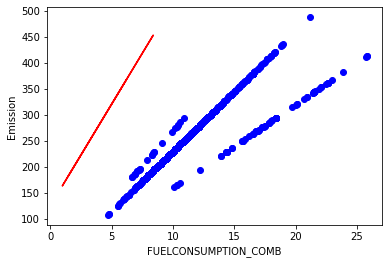

In [80]:
plt.scatter(X_train.FUELCONSUMPTION_COMB, X_train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

<h1>Evaluation</h1>



We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.



*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
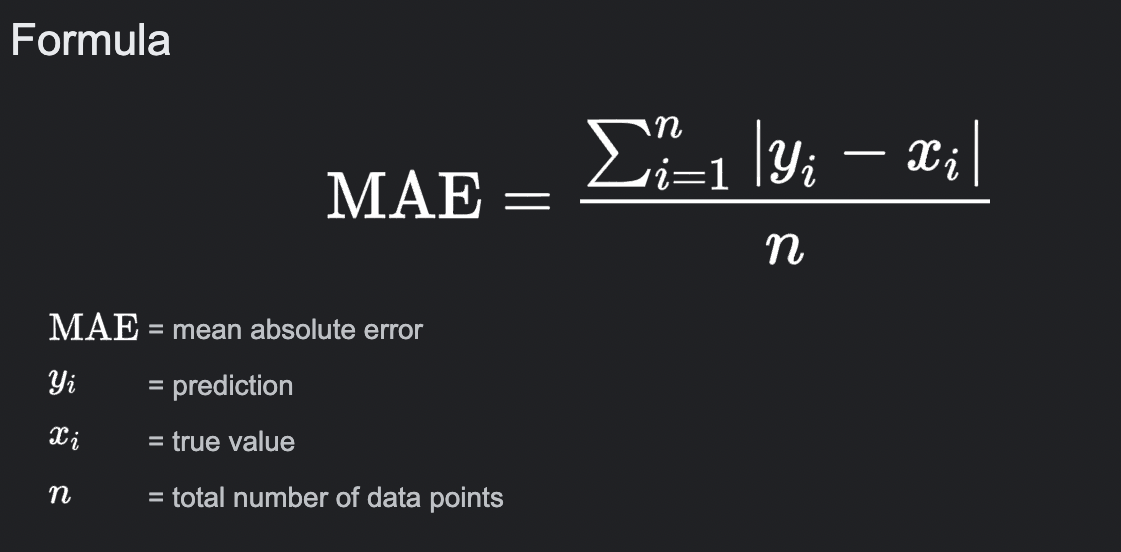

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
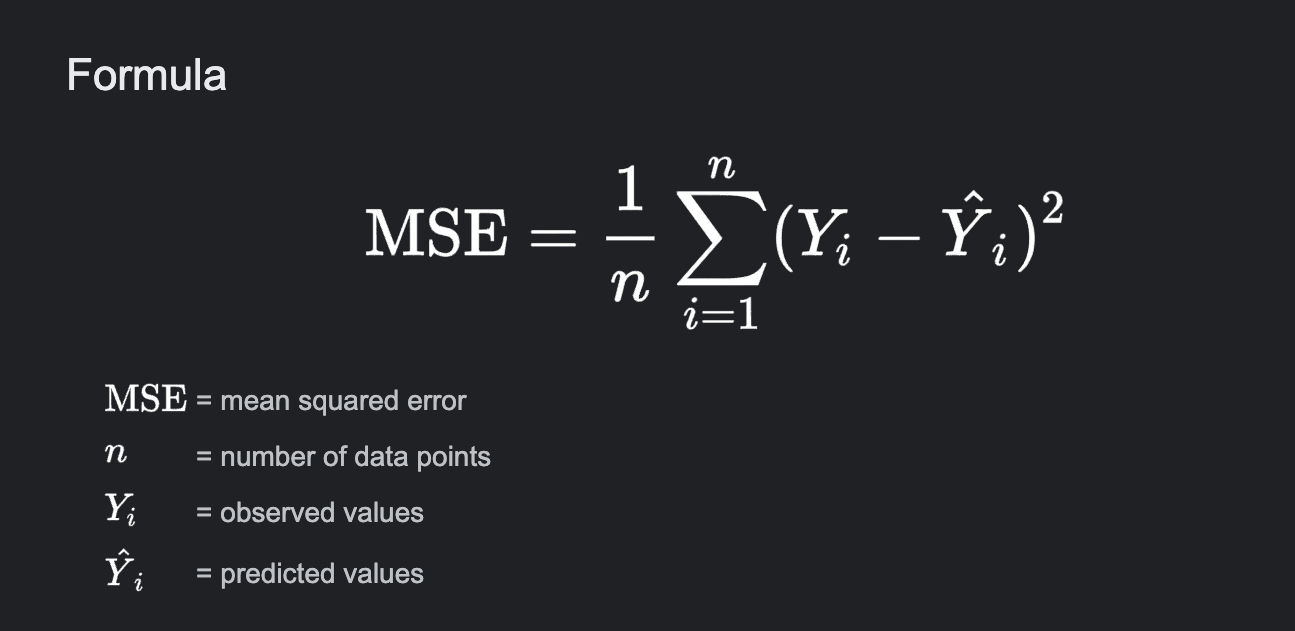


In [81]:
test_x = np.asanyarray(X_test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(X_test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
mae= np.mean(np.absolute(test_y_ - test_y))
mae_=mae/1067
mse=np.mean((test_y_ - test_y) ** 2)
mse_=mse/1067
print("Mean absolute error: " , mae_)
print("Residual sum of squares (MSE): " ,mse_ )

Mean absolute error:  0.2993248691885061
Residual sum of squares (MSE):  100.62027268835922


.predict is from scikit to predict the precision

<b>Inference</b>:
This shows that the accuracy of this algorithm with the given feature set is average 
<br>
The accuracy of the model can be improved by tuning the hyperparameters which will be covered later on in the course 

<h1>Project 1- prediction of House prices using supervised learning </h1>



* Note This project is based on the principles of linear regression taught in   class
* 💡I would recommend you to do this project with utmost focus and upload the same in your github account as a repository , this will help you build your project portfolio







This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

# House Sales in King County, USA

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


Importing the data set 

In [82]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
dff=pd.read_csv(file_name)

In [83]:
dff.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We use the method describe to obtain a statistical summary of the dataframe. ## This method might be new to you as it is not covered in the class, left as an exercise for you to explore 

In [84]:
dff.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#Question 1
Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. 

In [85]:
#start here 
dff. drop(["id","Unnamed: 0"], axis=1, inplace=True)
dff.describe()





,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## **Question 2 **


Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> 

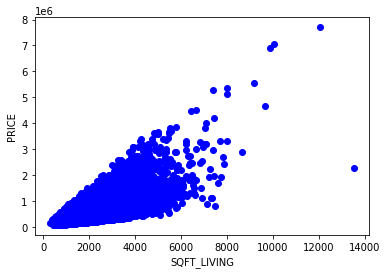

In [86]:
#Start your code here 
##plotted for your reference 
plt.scatter( dff.sqft_living,dff.price,  color='blue')
plt.xlabel("SQFT_LIVING")
plt.ylabel("PRICE")
plt.show()


In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dff,dff,test_size=.2,random_state=4);

In [88]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train[['sqft_living']])
train_y = np.asanyarray(X_train[['price']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[281.83375216]]
Intercept:  [-45850.76735561]


Text(0, 0.5, 'PRICE')

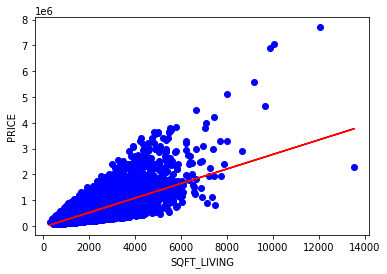

In [89]:
plt.scatter(X_train.sqft_living,X_train.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("SQFT_LIVING")
plt.ylabel("PRICE")

Question 3 


Evaluate the model for accuracy using the methods taught in class 


In [90]:
display(dff)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [91]:
#start here 
test_x = np.asanyarray(X_test[['sqft_living']])
test_y = np.asanyarray(X_test[['price']])
test_y_ = regr.predict(test_x)
mae= np.mean(np.absolute(test_y_ - test_y))
mae_=mae/21613
mse=np.mean((test_y_ - test_y) ** 2)
mse_=mse/21613
print("Mean absolute error: " , mae_)
print("Residual sum of squares (MSE): " ,mse_ )


Mean absolute error:  8.01952622105321
Residual sum of squares (MSE):  3093754.956167733


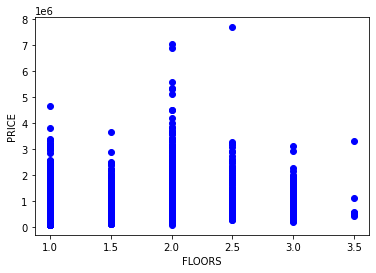

In [92]:
##plotted for your reference 
plt.scatter( dff.floors,dff.price,  color='blue')
plt.xlabel("FLOORS")
plt.ylabel("PRICE")
plt.show()

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dff,dff,test_size=.2,random_state=4);

In [94]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train[['floors']])
train_y = np.asanyarray(X_train[['price']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[176903.28625488]]
Intercept:  [275922.04073716]


Text(0, 0.5, 'PRICE')

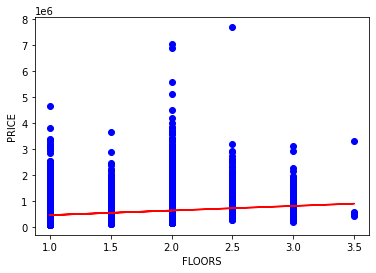

In [95]:
plt.scatter(X_train.floors, X_train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("FLOORS")
plt.ylabel("PRICE")

In [96]:
test_x = np.asanyarray(X_test[['floors']])
test_y = np.asanyarray(X_test[['price']])
test_y_ = regr.predict(test_x)
mae= np.mean(np.absolute(test_y_ - test_y))
mae_=mae/21613
mse=np.mean((test_y_ - test_y) ** 2)
mse_=mse/21613
print("Mean absolute error: " , mae_)
print("Residual sum of squares (MSE): " ,mse_ )

Mean absolute error:  10.318775527860838
Residual sum of squares (MSE):  5614093.94515966


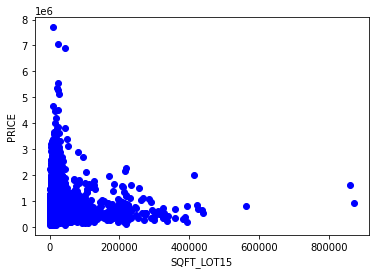

In [97]:
##plotted for your reference 
plt.scatter(dff.sqft_lot15,dff.price,color='blue')
plt.xlabel("SQFT_LOT15")
plt.ylabel("PRICE")
plt.show()

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dff,dff,test_size=.2,random_state=4);

In [99]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train[['sqft_lot15']])
train_y = np.asanyarray(X_train[['price']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1.0767275]]
Intercept:  [525930.51678849]


Text(0, 0.5, 'PRICE')

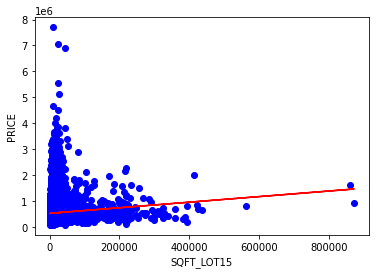

In [100]:
plt.scatter( X_train.sqft_lot15,X_train.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("SQFT_LOT15")
plt.ylabel("PRICE")

In [101]:
test_x = np.asanyarray(X_test[['sqft_lot15']])
test_y = np.asanyarray(X_test[['price']])
test_y_ = regr.predict(test_x)
mae= np.mean(np.absolute(test_y_ - test_y))
mae_=mae/21613
mse=np.mean((test_y_ - test_y) ** 2)
mse_=mse/21613
print("Mean absolute error: " , mae_)
print("Residual sum of squares (MSE): " ,mse_ )

Mean absolute error:  10.635270694112146
Residual sum of squares (MSE):  5941374.935368619


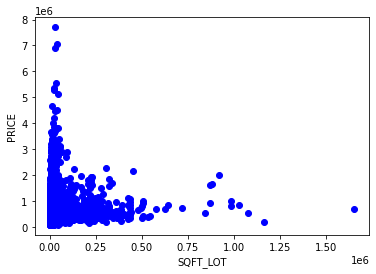

In [102]:
##plotted for your reference 
plt.scatter( dff.sqft_lot,dff.price,  color='blue')
plt.xlabel("SQFT_LOT")
plt.ylabel("PRICE")
plt.show()

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dff,dff,test_size=.2,random_state=4);

In [104]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train[['sqft_lot']])
train_y = np.asanyarray(X_train[['price']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.7739767]]
Intercept:  [528081.1404475]


Text(0, 0.5, 'PRICE')

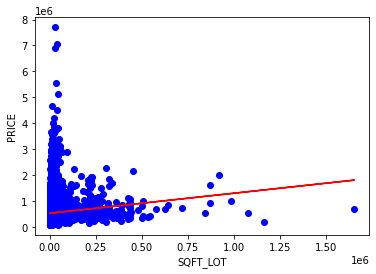

In [105]:
plt.scatter( X_train.sqft_lot,X_train.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("SQFT_LOT")
plt.ylabel("PRICE")

In [106]:
test_x = np.asanyarray(X_test[['sqft_lot']])
test_y = np.asanyarray(X_test[['price']])
test_y_ = regr.predict(test_x)
mae= np.mean(np.absolute(test_y_ - test_y))
mae_=mae/21613
mse=np.mean((test_y_ - test_y) ** 2)
mse_=mse/21613
print("Mean absolute error: " , mae_)
print("Residual sum of squares (MSE): " ,mse_ )

Mean absolute error:  10.625294828936248
Residual sum of squares (MSE):  5927072.61627958


Submission of this project is required for certification